#### itay zaada 


# Part 1-make tf idf dataframe and pick 15 highest scores ##

## explains

### I got the URL and parsed  with beautiful soup as HTML 

### Then I copy all the sentences in the paragraphs into one long string 

### then I made a counter of words function to make the tf

### then merged the tf with the idf CSV file (to collect only the words on the page) 

### then calculate tf*idf by multiplying the tf col in the idf col 

### created a word cloud

### final stage: pick the 15 highest scores 

In [1]:
import requests
from bs4 import BeautifulSoup
from collections import Counter
from string import punctuation
import urllib.request 
import matplotlib.pyplot as plt 

##part 1## 

# We get the url

url = "https://en.wikipedia.org/wiki/Batman"
  
# opening the url for reading in HTML
html = urllib.request.urlopen(url)
  
# parsing the html file
htmlParse = BeautifulSoup(html, 'html.parser')
bat=""  
# getting all the paragraphs into one long string
for para in htmlParse.find_all("p"):
    bat=bat+para.get_text().rstrip()   


    
bat=bat.replace("[a]", "").lower()
bat=bat.replace(".", "")

In [2]:
import pandas as pd
## make word counter for the tf ##
def word_count(str):
    counts = dict()
    words = str.split()
    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts



In [3]:
from heapq import nlargest
import pandas as pd
##  make atable maker for the tf idf merge and multification ##

def tabel_maker(bat):
    dic=word_count(bat)
    df=pd.DataFrame(dic.items(), columns=['word',"tf"])
    
    idf = pd.read_csv("wiki_tfidf_terms - small .csv") ## read the csv file ## 
    idf=idf.rename(columns={"token": "word"})
    idf['word']=idf['word'].str.lower()
    
    tf_idf = pd.merge(idf, df, how="right", on=["word"])
    tf_idf['idf']=tf_idf['idf'].fillna(0)
    tf_idf["tf*idf"] = tf_idf["tf"] * tf_idf["idf"]
    
    tf15=tf_idf.nlargest(15, 'tf')
    tf15=tf15.drop(['idf',"tf*idf"], axis=1)
    
    idf15=tf_idf.nlargest(15, 'idf')
    idf15=idf15.drop(['tf',"tf*idf"], axis=1)
   
    tf_idf15=tf_idf.nlargest(15, 'tf*idf')
    tf_idf15=tf_idf15.drop(['tf',"idf"], axis=1)
    print("15 best score tf ")
    print(tf15)
    print("____________________________________________")
    print(" ")
    print("15 best score idf ")
    print(idf15)
    print("____________________________________________")
    print(" ")
    print("15 best score tf_idf ")
    print(tf_idf15)
    return tf_idf15 ,idf15,tf15


In [4]:
tf_idf15 ,idf15,tf15=tabel_maker(bat)
## get the 15 best in tf ,idf,tf*idf##

15 best score tf 
       word    tf
13      the  1120
20      and   524
27       of   477
5        in   425
2         a   381
0    batman   363
107      to   347
99       as   208
60      his   187
1        is   161
66     with   152
15      was   132
346    that   123
69       he   120
10       by   118
____________________________________________
 
15 best score idf 
                word        idf
3021    non-lethally  12.273377
1651               2  12.238286
1774          tynion  12.238286
1604              52  12.204384
4198          moussi  12.204384
1396              28  12.139846
3934    reimaginings  12.139846
2611               4  12.079221
1434  batman-related  12.050234
1811               1  12.050234
2838              32  12.050234
1992       boltinoff  12.022063
2792      deathtraps  11.967996
1753               3  11.942020
2698             127  11.916702
____________________________________________
 
15 best score tf_idf 
          word       tf*idf
0       batman  251

# Part 1-summary ##
### tf-idf gave the best results beacuse the word are more conectted to the topic (batman) than the tf and idf results but the tf idf had numbers and connecting words in the high places so it effected the outcomes

# wordcounts ##
### i created word count for all of the words in the text then created word count for tf , idf , and tf *idf for the 15 words with the biggest score  as can see below ##

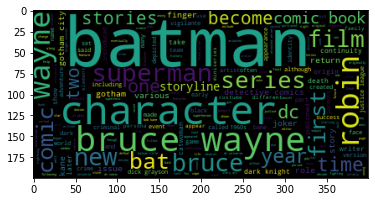

In [5]:
## the word cloud for all the words##

from wordcloud import WordCloud, STOPWORDS
wc = WordCloud().generate(bat)
plt.imshow(wc)


In [6]:
## Also made a word cloud for each metric tf,idf,tf*idf##

tf_idf15 ,idf15,tf15
tf15_w = dict(zip(tf15['word'].tolist(), tf15['tf'].tolist()))
idf15_W = dict(zip(idf15['word'].tolist(), idf15['idf'].tolist()))
tf_idf15_w = dict(zip(tf_idf15['word'].tolist(), tf_idf15['tf*idf'].tolist()))


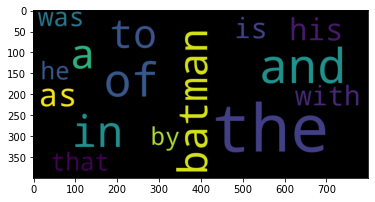

In [7]:
##for tf ## 

wc = WordCloud(width=800, height=400, max_words=15).generate_from_frequencies(tf15_w)
plt.imshow(wc)


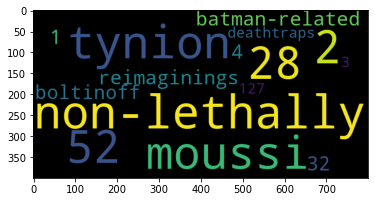

In [8]:
###for idf ## 

wc = WordCloud(width=800, height=400, max_words=15).generate_from_frequencies(idf15_W)
plt.imshow(wc)


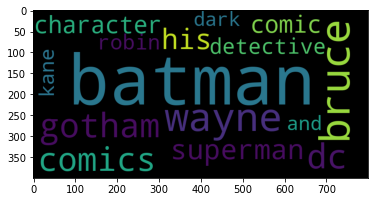

In [9]:
#####for tf*idf ## 

wc = WordCloud(width=800, height=400, max_words=15).generate_from_frequencies(tf_idf15_w)
plt.imshow(wc)


# Part 2-Explains
### i removed stop words, punctuation, Conjunction  Junction words and numbers  to improve the results because  "conetction words"  and numbers are not very connected to the subject "batman"  so removing them gave better results because another and more related  words steps in instead to the top 15

In [10]:
import nltk
from nltk.corpus import stopwords
import string 
from string import digits
##part 2 ##


stop_words = stopwords.words('english')##remove stop words##
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

tokens = nltk.word_tokenize(bat)
bati =""

remove_digits = str.maketrans('', '', digits)


bad_words=["'s","``","In","also","The","''"," s"]
for words in tokens:
    if not words in stop_words :
        if not words in string.punctuation:
             if not words in bad_words:
                    bati=bati+" "+words

bati=bati.translate(remove_digits)


In [11]:
tf_idf15 ,idf15,tf15=tabel_maker(bati)


15 best score tf 
          word   tf
0       batman  552
27       wayne  128
26       bruce  120
9    character   82
8       comics   73
123     series   72
7           dc   70
65       robin   53
33      gotham   52
121          s   46
83    superman   45
409        new   45
4        comic   43
173      first   40
36       story   35
____________________________________________
 
15 best score idf 
                word        idf
2217    non-lethally  12.273377
1267          tynion  12.238286
3065          moussi  12.204384
2633          anthro  12.171595
827        bat-hound  12.139846
2878    reimaginings  12.139846
1978           kyudo  12.079221
262          'batman  12.050234
568          'credit  12.050234
1032  batman-related  12.050234
1437       boltinoff  12.022063
2045      deathtraps  11.967996
2564           omacs  11.967996
2227      bat-shaped  11.916702
2675   psycho-pirate  11.916702
____________________________________________
 
15 best score tf_idf 
          word 

# Part 2-Summary ##
### the changes gave better results (tf and idf) which are more related to batman like omacs(batman villan)  ,boltinoff (batman cartoonist),tynion(batman wrtiter ) ,comics,dc( batman Publishing company) and etc and then i created another set of wordcount for tf idf and tf*idf after the changes , and as can see the wordcount words are seems alot better 

In [12]:
##  made a word cloud for each metric tf,idf,tf*idf after the improvment ##

tf_idf15 ,idf15,tf15
tf15_w = dict(zip(tf15['word'].tolist(), tf15['tf'].tolist()))
idf15_W = dict(zip(idf15['word'].tolist(), idf15['idf'].tolist()))
tf_idf15_w = dict(zip(tf_idf15['word'].tolist(), tf_idf15['tf*idf'].tolist()))


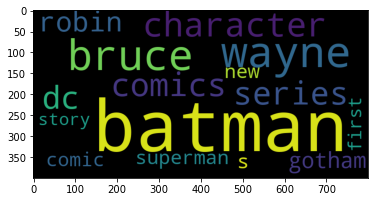

In [13]:
##for tf ## 
wc = WordCloud(width=800, height=400, max_words=15).generate_from_frequencies(tf15_w)
plt.imshow(wc)

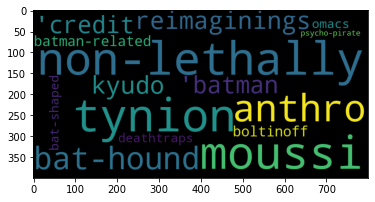

In [14]:
###for idf ## 

wc = WordCloud(width=800, height=400, max_words=15).generate_from_frequencies(idf15_W)
plt.imshow(wc)


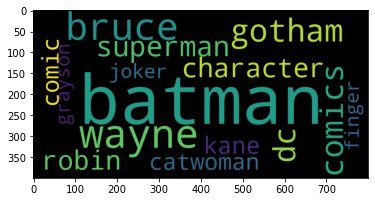

In [15]:
#####for tf*idf ## 

wc = WordCloud(width=800, height=400, max_words=15).generate_from_frequencies(tf_idf15_w)
plt.imshow(wc)
